# __Logistic Regression (Classification)__

## __The Logistic Regression Process:__

### 1. Read in data as DataFrame
### 2. Begin initial exploratory data analysis and visual variables against one another to discover patterns
### 3. Cleaning missing data
### 4. Handling categorical features by converting it into a dummy variable with pd.ge_dummies()
### 5. Train the model
### 6. Evaluate the model

## __1. Read in Data as DataFrame__

In [1]:
# Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Adjust the figure size and general styling first
sns.set_style(style='darkgrid')
sns.set_context('paper', font_scale=1.5)
sns.set_palette(palette='bright')

In [3]:
train = pd.read_csv('../13-Logistic-Regression/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Show summary of rows of data, null values and data type
# We will work through these columns below into charts and examine what variables will be interesting to explore
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## __2. Exploratory Data Analysis__

<AxesSubplot:>

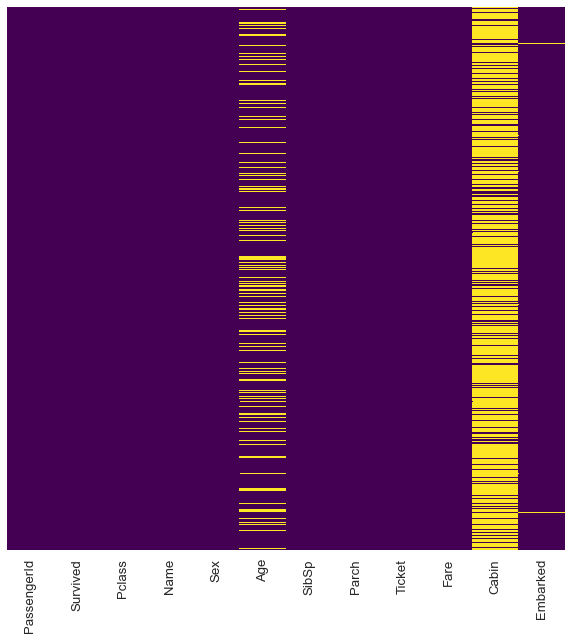

In [5]:
# Show missing data as heatmap - this will give you an idea which column(s) have 
# missing null / missing data as well as their magnitude
plt.figure(figsize=(10,10))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False,cmap='viridis')

# So we can see that Age and Cabin have plenty of missing values. Embarked has a few missing.

<AxesSubplot:xlabel='Survived', ylabel='count'>

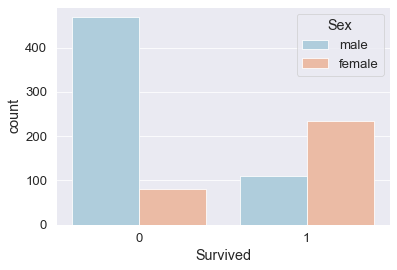

In [6]:
# Show a barchart of who survived vs. who didn't by Sex
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

# We can see that males are less likely to survive. Females more likely to survive.

<AxesSubplot:xlabel='Survived', ylabel='count'>

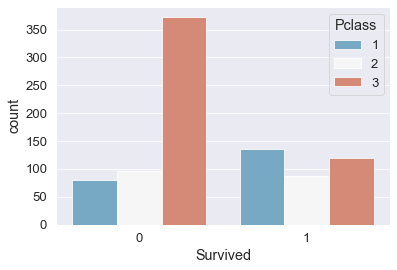

In [7]:
# Show a barchart of who survived vs. who didn't by Passenger Class
sns.countplot(x='Survived', data=train, hue='Pclass', palette='RdBu_r')

# Those who didn't survive mostly 3rd class.

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

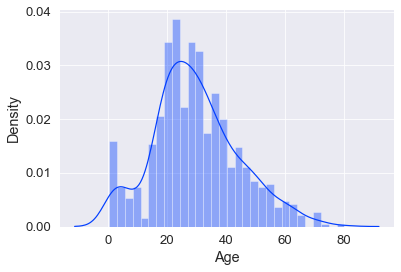

In [8]:
# Find distribution of age of travellers, afte dropping all na values
sns.distplot(train['Age'].dropna(), kde=True, bins=30)

# We can see kinda of a bi-modal distribuion

<AxesSubplot:xlabel='SibSp', ylabel='count'>

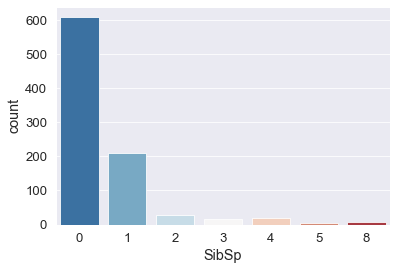

In [9]:
# Show countplot of siblings / spouse on board
sns.countplot(x='SibSp', data=train, palette='RdBu_r')

# We can see plenty of single people onboard

<AxesSubplot:xlabel='Fare', ylabel='Count'>

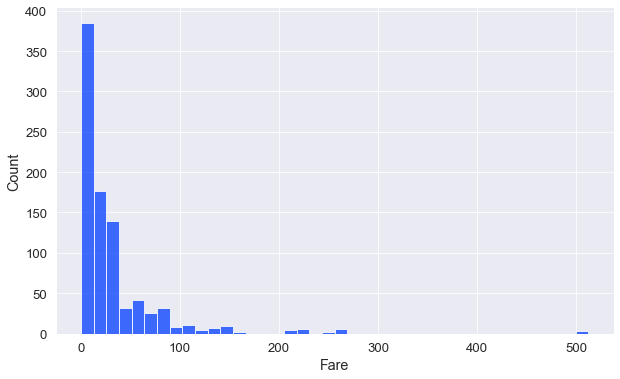

In [10]:
# See distribution of fares paid
plt.figure(figsize=(10,6))
sns.histplot(x='Fare', data=train, bins=40)

# Most fares distributed to the cheaper tickets - this confirms what we see above with 3rd class being the most

## _Interactive Charts with cufflinks / bokeh_

In [11]:
import cufflinks as cf

In [12]:
cf.go_offline()

In [13]:
# Unfortunately, cufflinks don't work well with JupyterLab or something...
train['Fare'].iplot(kind='hist', bins=30)

In [14]:
# Standard bokeh imports
from bokeh.io import output_notebook, show, reset_output

# Other bokeh imports
import bokeh
from bokeh.plotting import figure
from bokeh.models import HoverTool

In [15]:
# Loads bokeh within the notebook
output_notebook()

Loading BokehJS ...

In [16]:
data = np.random.normal(0, 0.5, 1000)
hist, edges = np.histogram(train['Fare'], density=True, bins=50)

p = figure()
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], line_color="white")

# Add Hover Tool
p.add_tools(HoverTool())

show(p)

## __3. Cleaning Missing Data__

#### Imputation: Process of replacing missing data with substituted values.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

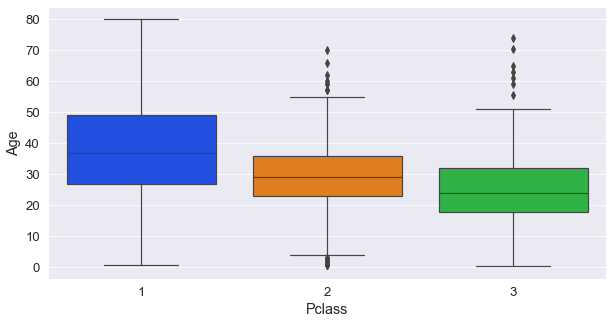

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Pclass', y='Age', data=train)

# Wealthier folks abit older

In [18]:
# Create function to find mean age of each Passenger Class and apply them
def impute_age(cols):
    Age = cols[0]
    Pclass= cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return train[train['Pclass']==1]['Age'].mean()
        elif Pclass ==2:
            return train[train['Pclass']==2]['Age'].mean()
        else:
            return train[train['Pclass']==3]['Age'].mean()
    else:
        return Age

In [19]:
print(train[train['Pclass']==1]['Age'].mean())
print(train[train['Pclass']==2]['Age'].mean())
print(train[train['Pclass']==3]['Age'].mean())

38.233440860215055
29.87763005780347
25.14061971830986


In [20]:
# Run the function with and return data into the DataFrame with df.apply()
# df.apply() applies function along an axis of DataFrame
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1) # axis=1 since we are applying to each row

In [21]:
# Now we can see that Age has no more missing / null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

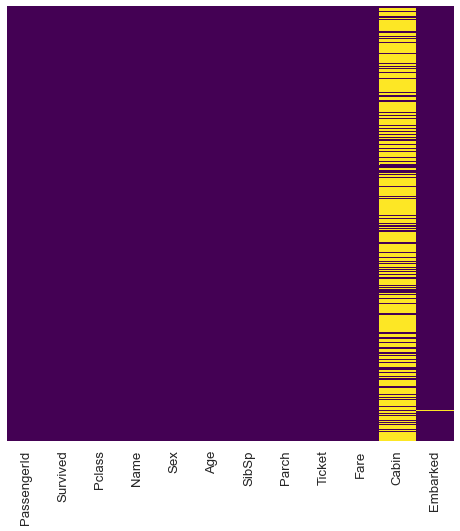

In [22]:
plt.figure(figsize=(8,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [23]:
# Cabin has too many missing values, so we will drop that column
train.drop('Cabin', axis=1, inplace=True)

In [24]:
# No more column called 'Cabin'
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

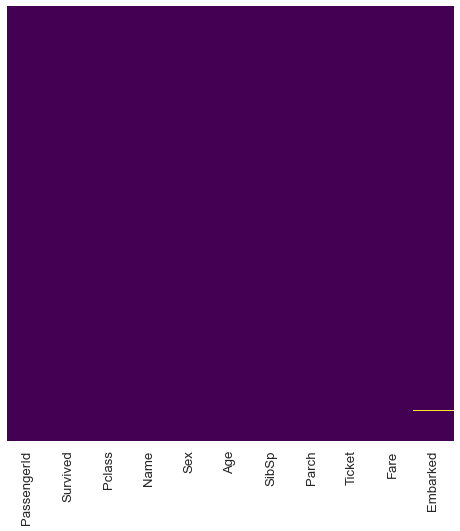

In [25]:
plt.figure(figsize=(8,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [26]:
# Since the 'Embarked' column has very few missing values, we can choose to drop those rows
train.dropna(inplace=True)

<AxesSubplot:>

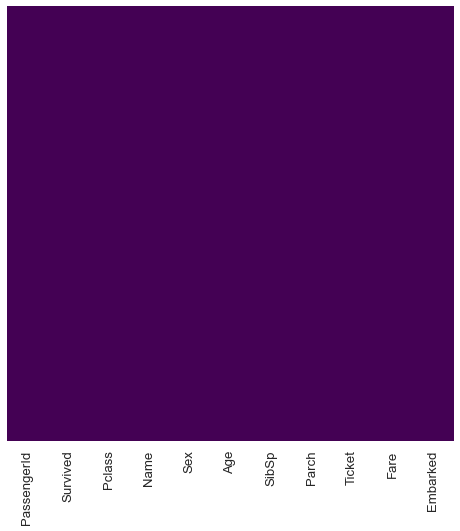

In [27]:
plt.figure(figsize=(8,8))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## __4. Handling Categorical Features by Converting them into Dummy Variables__

#### Since Machine Learning algorithm can't handle categorical data, needs to convert to 0,1 for example.
#### We also encounter multicollinearity problems: Occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.

In [28]:
# Use pd.get_dummies() to convert categorical data into dummy variables
pd.get_dummies(train['Sex'])
# female = 0, male = 1 - BUT THIS IS A PROBLEM - multicollinearity: 
# since if female = 0, male will definitely be 1 and vice versa.

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [29]:
# Thus to prevent multicollinearity, we drop 1 of the columns
sex = pd.get_dummies(train['Sex'], drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [30]:
pd.get_dummies(train['Embarked'], drop_first=True)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [31]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark.head() # Drops the C column

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [32]:
# After we are done dealing with all the categorical columns, we can add them to the DataFrame
train = pd.concat([train,sex,embark], axis=1) # axis=1 since we are concatenating along columns - adding new columns
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [33]:
# Now, we can drop the columns that we have encoded above and other columns that are not very useful
train.drop(['Sex','Embarked','Name','Ticket'], axis=1, inplace=True) 
train.head() # Now all data is numerical and no missing values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [34]:
# PassengerId is useless as a predictor since it's just the index position of each passenger
train.drop(['PassengerId'], axis=1, inplace=True)
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


## __4. Train the model__

#### _We will treat the train data set as our full set of data just so we can practice train test split._

In [35]:
X = train.drop('Survived', axis=1) # What will be used to predict (features)
y = train['Survived'] # What we want to predict (label)

In [37]:
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.00000,1,0,7.2500,1,0,1
1,1,38.00000,1,0,71.2833,0,0,0
2,3,26.00000,0,0,7.9250,0,0,1
3,1,35.00000,1,0,53.1000,0,0,1
4,3,35.00000,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
886,2,27.00000,0,0,13.0000,1,0,1
887,1,19.00000,0,0,30.0000,0,0,1
888,3,25.14062,1,2,23.4500,0,0,1
889,1,26.00000,0,0,30.0000,1,0,0


In [38]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [39]:
# Import train test split
from sklearn.model_selection import train_test_split

In [40]:
# We are allocating 40% to test size with random seed of 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [42]:
# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [47]:
# Instantiate the Linear Regression model
logmodel = LogisticRegression(max_iter=10000) # Here we raise the max number of iterations

In [48]:
# Train model on training data only
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [49]:
# Predict the model
predictions = logmodel.predict(X_test)

## __5. Evaluate the model__

In [51]:
# Use sklearn's built-in classification report
from sklearn.metrics import classification_report

In [52]:
# Shows evaluation metrics of your predictions against your test data (NOT train data)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       163
           1       0.85      0.70      0.77       104

    accuracy                           0.84       267
   macro avg       0.84      0.81      0.82       267
weighted avg       0.84      0.84      0.83       267



In [53]:
# Or you can use a confusion matrix
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_test, predictions)

array([[150,  13],
       [ 31,  73]], dtype=int64)

#### _So what else can we do? Perhaps we can utilize the entire training set (after clearning it). More feature engineering - Name, Cabin Letter, Ticket, etc._

## __Extra: What happens if we encoded the Pclass column as dummy variables? How does it differ compared to using its actual values in the model?__

In [55]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [56]:
# Convert Pclass to dummy variable
pd.get_dummies(train['Pclass'])

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [59]:
pclass = pd.get_dummies(train['Pclass'], drop_first=True)
pclass.head() # Drops the 1 column

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1


In [60]:
# Concat the pclass dummy variable columns to the train DataFrame
train = pd.concat([train,pclass], axis=1) # axis=1 since we are concatenating along columns - adding new columns
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,1,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1


In [65]:
# Drop the Pclass column
train = train.drop('Pclass', axis=1)
train.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [66]:
# Train the model
X = train.drop('Survived', axis=1) # What will be used to predict (features)
y = train['Survived'] # What we want to predict (label)

In [67]:
X

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.00000,1,0,7.2500,1,0,1,0,1
1,38.00000,1,0,71.2833,0,0,0,0,0
2,26.00000,0,0,7.9250,0,0,1,0,1
3,35.00000,1,0,53.1000,0,0,1,0,0
4,35.00000,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,27.00000,0,0,13.0000,1,0,1,1,0
887,19.00000,0,0,30.0000,0,0,1,0,0
888,25.14062,1,2,23.4500,0,0,1,0,1
889,26.00000,0,0,30.0000,1,0,0,0,0


In [68]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [69]:
# Import train test split
from sklearn.model_selection import train_test_split

In [70]:
# We are allocating 40% to test size with random seed of 101
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [71]:
# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

In [72]:
# Instantiate the Linear Regression model
logmodel = LogisticRegression(max_iter=10000) # Here we raise the max number of iterations

In [73]:
# Train model on training data only
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [74]:
# Predict the model
predictions = logmodel.predict(X_test)

In [75]:
# Use sklearn's built-in classification report
from sklearn.metrics import classification_report

In [76]:
# Shows evaluation metrics of your predictions against your test data (NOT train data)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [77]:
# Or you can use a confusion matrix
from sklearn.metrics import confusion_matrix

In [78]:
confusion_matrix(y_test, predictions)

array([[149,  14],
       [ 33,  71]], dtype=int64)

### The End.
### Thank You!